In [1]:
using Images, Plots

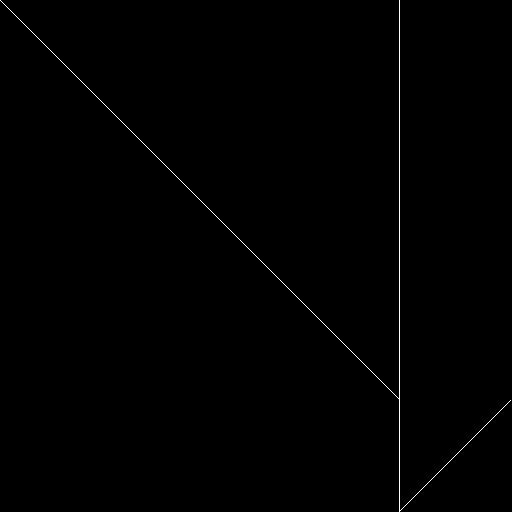

In [57]:
function applyFuncToImage(img, f)
    height, width = size(img)
    for x ∈ 1:height
        for y ∈ 1:width
            img[x,y] = f(img[x,y],x,y)
        end
    end
end

height, width = 512, 512
img = fill(RGB(), height, width)

function leftWall(prev,x,y)
    y == 400 ? RGB(1,1,1) : RGB()
end
function ray(prev,x,y)
    if x > 400
        return (x-400) == (512-y) ? RGB(1,1,1) : prev
    else
        return x == y ? RGB(1,1,1) : prev
    end
end

applyFuncToImage(img, leftWall)
applyFuncToImage(img, ray)
img

In [2]:
f(x,y) = 3
a = 1:10
f.(a)

LoadError: MethodError: no method matching f(::Int64)
Closest candidates are:
  f(::Any, !Matched::Any) at In[2]:1

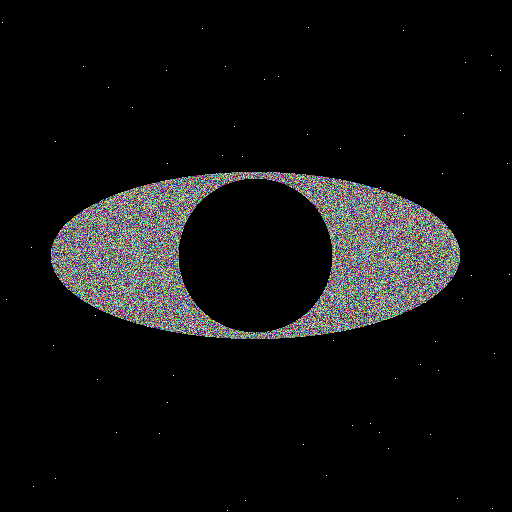

In [65]:
height = 512
width = 512
dist(x,y,x′,y′) = sqrt((x′-x)^2 + (y′-y)^2)
m = Array{RGB{Float64}, 2}(undef, height, width)
for x ∈ 1:height
    for y ∈ 1:width
        m[x,y] = RGB()
    end
end
for i ∈ 1:74
    x = Int(ceil(rand()*height))
    y = Int(ceil(rand()*width))
    m[x,y] = RGB(1,1,1)
end
for x ∈ 1:height
    for y ∈ 1:width
        xdist = (x/height - 0.5)^2
        ydist = (y/width - 0.5)^2
        if sqrt(6*xdist + ydist) < .4
            m[x,y] = RGB(rand(),rand(),rand())
        end
    end
end
for x ∈ 1:height
    for y ∈ 1:width
        if dist(x/height, y/width, 0.5, 0.5) < .15
            m[x,y] = RGB()
        end
    end
end
m

In [80]:
data = []
x = 0
y = 0
xmax = 0
xmin = 0
ymax = 0
ymin = 0
for i ∈ 1:1000
    x = x + rand()
    y = y + rand()
    xmax = max(x,xmax)
    xmin = min(x,xmin)
    ymax = max(y,ymax)
    ymin = min(y,ymin)
    push!(data,[x,y])
end
m = Array{RGB{Float64}, 2}(undef, 512,512)
for point in data
    x = Int(ceil((((x-xmin) / (xmax-xmin)) * 512)))
    y = Int(ceil((((y-ymin) / (ymax-ymin)) * 512)))
end

LoadError: InexactError: Int64(9.441488878158295e18)